In [14]:
import pandas as pd

covid_df = pd.read_csv('data/covid_data.csv')
covid_df = covid_df.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['active'] = covid_df['confirmed'] - covid_df['deaths'] - covid_df['recovered']
covid_df = covid_df.sort_values(by=['country', 'date'])
covid_df['daily_confirmed'] = covid_df.groupby('country')['confirmed'].diff()
covid_df['daily_deaths'] = covid_df.groupby('country')['deaths'].diff()
covid_df['daily_recovered'] = covid_df.groupby('country')['recovered'].diff()
covid_df.tail()

date                         country  confirmed  deaths  \
15933 2020-03-12  occupied Palestinian territory        0.0     0.0   
16595 2020-03-14  occupied Palestinian territory        0.0     0.0   
16938 2020-03-15  occupied Palestinian territory        0.0     0.0   
17290 2020-03-16  occupied Palestinian territory        0.0     0.0   
17645 2020-03-17  occupied Palestinian territory        0.0     0.0   

       recovered  active  daily_confirmed  daily_deaths  daily_recovered  
15933        0.0     0.0              0.0           0.0              0.0  
16595        0.0     0.0              0.0           0.0              0.0  
16938        0.0     0.0              0.0           0.0              0.0  
17290        0.0     0.0              0.0           0.0              0.0  
17645        0.0     0.0              0.0           0.0              0.0

In [24]:
vacc_df = pd.read_csv('data/country_vaccinations.csv')
vacc_df = vacc_df[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vacc_df['date'] = pd.to_datetime(vacc_df['date'])
display(vacc_df)

country       date  total_vaccinations  people_vaccinated  \
0      Afghanistan 2021-02-22                 0.0                0.0   
1      Afghanistan 2021-02-23                 NaN                NaN   
2      Afghanistan 2021-02-24                 NaN                NaN   
3      Afghanistan 2021-02-25                 NaN                NaN   
4      Afghanistan 2021-02-26                 NaN                NaN   
...            ...        ...                 ...                ...   
42790     Zimbabwe 2021-09-01           4270430.0          2615233.0   
42791     Zimbabwe 2021-09-02           4323735.0          2649505.0   
42792     Zimbabwe 2021-09-03           4372216.0          2681657.0   
42793     Zimbabwe 2021-09-04           4400246.0          2698332.0   
42794     Zimbabwe 2021-09-05           4431599.0          2713248.0   

       people_vaccinated_per_hundred  people_fully_vaccinated  \
0                               0.00                      NaN   
1                                NaN                      NaN   
2                                NaN                      NaN   
3                                NaN                      NaN   
4                                NaN                      NaN   
...                              ...                      ...   
42790                          17.33                1655197.0   
42791                          17.56                1674230.0   
42792                          17.77                1690559.0   
42793                          17.88                1701914.0   
42794                          17.98                1718351.0   

       people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                      NaN                 NaN   
1                                      NaN              1367.0   
2                                      NaN              1367.0   
3                                      NaN              1367.0   
4                                      NaN              1367.0   
...                                    ...                 ...   
42790                                10.97             36416.0   
42791                                11.09             39711.0   
42792                                11.20             42317.0   
42793                                11.28             41413.0   
42794                                11.39             41964.0   

                                                vaccines  
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
...                                                  ...  
42790  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  
42791  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  
42792  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  
42793  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  
42794  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  

[42795 rows x 9 columns]

In [28]:
#covid_df = covid_df.sort_values(by=['date'])
#covid_df.head()
covid_df.shape

(86785, 9)

In [26]:
#vacc_df = vacc_df.sort_values(by=['date'])
#vacc_df.head()
vacc_df.tail()

country       date  total_vaccinations  people_vaccinated  \
29639     Pakistan 2021-09-06          63319214.0         48106755.0   
6809        Canada 2021-09-06          53829771.0         28120156.0   
30024       Panama 2021-09-06           4711715.0          2819641.0   
36494  South Sudan 2021-09-06             59865.0            53147.0   
41328      Uruguay 2021-09-06           5779889.0          2686742.0   

       people_vaccinated_per_hundred  people_fully_vaccinated  \
29639                          21.36               20058377.0   
6809                           73.87               25709615.0   
30024                          64.35                1892074.0   
36494                           0.47                   6718.0   
41328                          77.09                2530652.0   

       people_fully_vaccinated_per_hundred  daily_vaccinations  \
29639                                 8.91           1182525.0   
6809                                 67.54             81797.0   
30024                                43.18             50933.0   
36494                                 0.06               388.0   
41328                                72.61             34491.0   

                                                vaccines  
29639  CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...  
6809        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech  
30024                Oxford/AstraZeneca, Pfizer/BioNTech  
36494                                 Oxford/AstraZeneca  
41328       Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac

In [32]:
#covid_data = covid_df.merge(
#    vacc_df,
#    on=['date','country'],
#    how='left'
#)
covid_data.head()


date    country  confirmed  deaths  recovered  active  \
0 2020-01-22      Japan        2.0     0.0        0.0     2.0   
1 2020-01-22  Hong Kong        0.0     0.0        0.0     0.0   
2 2020-01-22      China      547.0    17.0       28.0   502.0   
3 2020-01-22   Thailand        4.0     0.0        2.0     2.0   
4 2020-01-22     Taiwan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              NaN           NaN              NaN                 NaN   
2              NaN           NaN              NaN                 NaN   
3              NaN           NaN              NaN                 NaN   
4              NaN           NaN              NaN                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  
0                                  NaN                 NaN      NaN  
1                                  NaN                 NaN      NaN  
2                                  NaN                 NaN      NaN  
3                                  NaN                 NaN      NaN  
4                                  NaN                 NaN      NaN

In [37]:
#covid_data['death_rate']=covid_data['deaths']/covid_data['confirmed']*100
#covid_data['recover_rate']=covid_data['recovered']/covid_data['confirmed']*100
covid_data[covid_data['country']=='Russia']['recover_rate'].mean()

67.06273489477655

In [ ]:
grouped_cases = covid_data.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(18, 6),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

In [ ]:
covid_data.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [44]:
%matplotlib inline

In [45]:
import seaborn as sns
print(sns.__version__)


0.12.2


In [47]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_data[covid_data['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  confirmed_per_hundred  
0         NaN           NaN    25726900               0.000000  
1         0.0           0.0    25726900               0.000016  
2         0.0           0.0    25726900               0.000016  
3         0.0           0.0    25726900               0.000019  
4         0.0           0.0    25726900               0.000019

In [ ]:
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

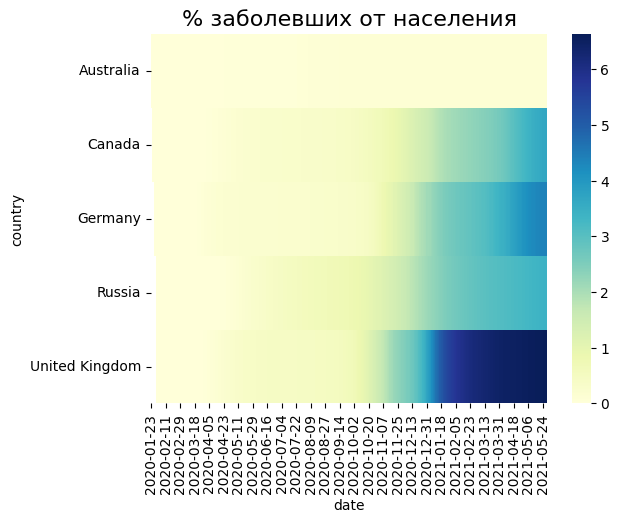

In [49]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('% заболевших от населения', fontsize=16);

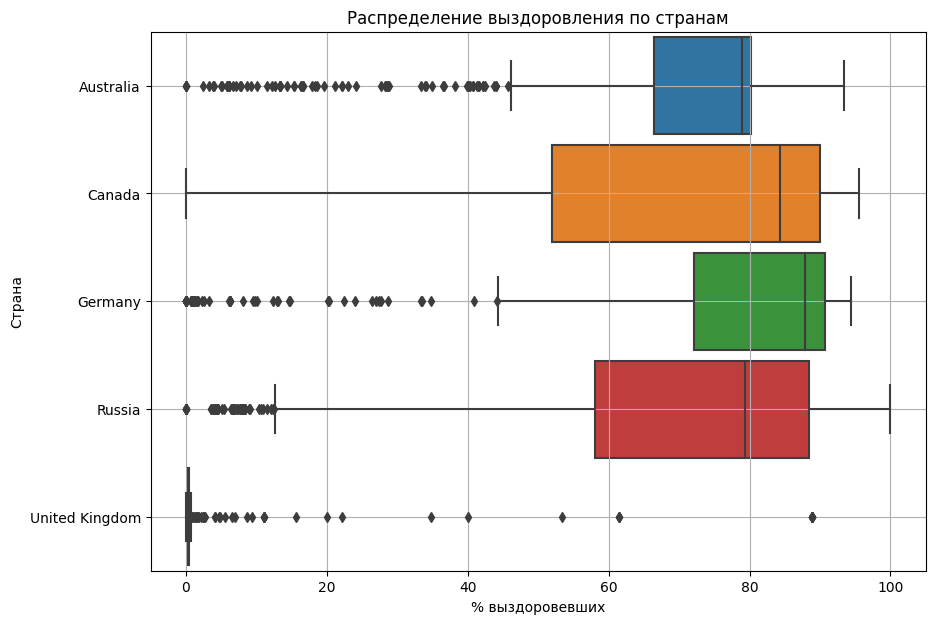

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение выздоровления по странам');
boxplot.set_xlabel('% выздоровевших');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [52]:
import plotly
import plotly.express as px
line_data = covid_data.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #датафрейм
    x='date', #ось абсцисс
    y=['daily_vaccinations'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Vaccinations over Time' #заголовок
)
fig.show()

C:\Users\a.kornilov\AppData\Local\Temp\ipykernel_14556\457235853.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  line_data = covid_data.groupby('date', as_index=False).sum()


In [53]:
#преобразуем даты в строки
choropleth_data = covid_data.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #датафрейм
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="total_vaccinations", #от чего зависит цвет
    animation_frame="date", #анимационный ползунок
    range_color=[0, 30e6],
    title='Vaccinations progress', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show()

In [54]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0